In [1]:
import pandas as pd

# Load the Excel file to review its structure and datasets
file_path = '/content/Akash assignment.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the datasets provided
sheet_names = excel_data.sheet_names
sheet_names


['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

The Excel file contains three sheets:

**UserDetails.csv** - Likely contains information about users.
**CookingSessions.csv** - Likely contains data about cooking sessions.
**OrderDetails.csv** - Likely contains data about orders.

**Next step** is to analyze these datasets to clean, merge, and explore insights.

In [2]:
# Load each dataset into a DataFrame for analysis
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display the first few rows of each dataset to understand their structure
user_details_preview = user_details.head()
cooking_sessions_preview = cooking_sessions.head()
order_details_preview = order_details.head()

user_details_preview, cooking_sessions_preview, order_details_preview


(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lunch 202

The datasets provide the following details:

UserDetails:
**Key Columns**: User ID, User Name, Age, Location, Registration Date, Favorite Meal, Total Orders.
CookingSessions:
**Key Columns**: Session ID, User ID, Dish Name, Meal Type, Session Start, Duration, Rating.
OrderDetails:
**Key Columns**: Order ID, User ID, Dish Name, Meal Type, Order Status, Amount, Rating, Session ID.


**Next Step** :                                                                                                                                                
**Data Cleaning**: Handle missing values, ensure consistent formats, and remove duplicates.               
**Data Merging**: Integrate the datasets using User ID and Session ID where relevant.                          
**Analysis**:
Relationship between cooking sessions and orders.
Identification of popular dishes.
Exploration of demographic factors affecting user behavior.                                               
**Visualizations**: Generate insightful graphs.
Report: Summarize findings with recommendations.

In [3]:
# Check for missing values in each dataset
missing_user_details = user_details.isnull().sum()
missing_cooking_sessions = cooking_sessions.isnull().sum()
missing_order_details = order_details.isnull().sum()

# Remove duplicate rows if any
user_details_cleaned = user_details.drop_duplicates()
cooking_sessions_cleaned = cooking_sessions.drop_duplicates()
order_details_cleaned = order_details.drop_duplicates()

# Display missing values summary
missing_summary = {
    "UserDetails Missing Values": missing_user_details,
    "CookingSessions Missing Values": missing_cooking_sessions,
    "OrderDetails Missing Values": missing_order_details,
}

missing_summary


{'UserDetails Missing Values': User ID              0
 User Name            0
 Age                  0
 Location             0
 Registration Date    0
 Phone                0
 Email                0
 Favorite Meal        0
 Total Orders         0
 dtype: int64,
 'CookingSessions Missing Values': Session ID         0
 User ID            0
 Dish Name          0
 Meal Type          0
 Session Start      0
 Session End        0
 Duration (mins)    0
 Session Rating     0
 dtype: int64,
 'OrderDetails Missing Values': Order ID        0
 User ID         0
 Order Date      0
 Meal Type       0
 Dish Name       0
 Order Status    0
 Amount (USD)    0
 Time of Day     0
 Rating          2
 Session ID      0
 dtype: int64}

The datasets are mostly clean with the following notes:

**UserDetails and CookingSessions**: No missing values.                              
**OrderDetails**: Two missing values in the Rating                     column.                                                                            

**Next Steps:**                                                                             
**Handle Missing Ratings**: Replace missing values with the median rating or another suitable approach.                                                       
**Merge Data**: Combine the datasets using User ID and Session ID for integrated analysis.
Begin the exploratory analysis and visualizations.

In [4]:
# Handle missing values in the 'Rating' column of OrderDetails
order_details_cleaned['Rating'] = order_details_cleaned['Rating'].fillna(order_details_cleaned['Rating'].median())

# Merge UserDetails with CookingSessions using 'User ID'
user_sessions = pd.merge(cooking_sessions_cleaned, user_details_cleaned, on='User ID', how='left')

# Merge the above result with OrderDetails using 'Session ID'
merged_data = pd.merge(user_sessions, order_details_cleaned, on='Session ID', how='left')

# Display the first few rows of the merged dataset to confirm the structure
merged_data_preview = merged_data.head()

# Check for any remaining missing values in the merged dataset
merged_data_missing = merged_data.isnull().sum()

merged_data_preview, merged_data_missing


(  Session ID User ID_x      Dish Name_x Meal Type_x       Session Start  \
 0       S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
 1       S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
 2       S003      U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
 3       S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
 4       S005      U004     Caesar Salad       Lunch 2024-12-03 13:00:00   
 
           Session End  Duration (mins)  Session Rating      User Name  Age  \
 0 2024-12-01 19:30:00               30             4.5  Alice Johnson   28   
 1 2024-12-01 12:20:00               20             4.0      Bob Smith   35   
 2 2024-12-02 20:10:00               40             4.8    Charlie Lee   42   
 3 2024-12-02 08:00:00               30             4.2  Alice Johnson   28   
 4 2024-12-03 13:15:00               15             4.7    David Brown   27   
 
    ... Total Orders Order ID User ID_y Order Date Meal Type_y  \


The merged dataset is clean and complete with no missing values. The structure includes all relevant fields from the original datasets, enabling comprehensive analysis.

**Key Columns in the Merged Dataset:**                                            
**Session Details**: Dish Name, Meal Type, Session Duration, Rating.                        
**User Details**: Age, Location, Registration Date, Favorite Meal.                         
**Order Details**: Order Status, Amount, Rating, Time of Day.                               

**Next Step:**                                                                        

1.   Analyze the relationship between cooking sessions and orders.
2.   Identify popular dishes based on frequency and ratings.
3.   Explore demographic influences on user behavior.
4.   Create visualizations for insights.

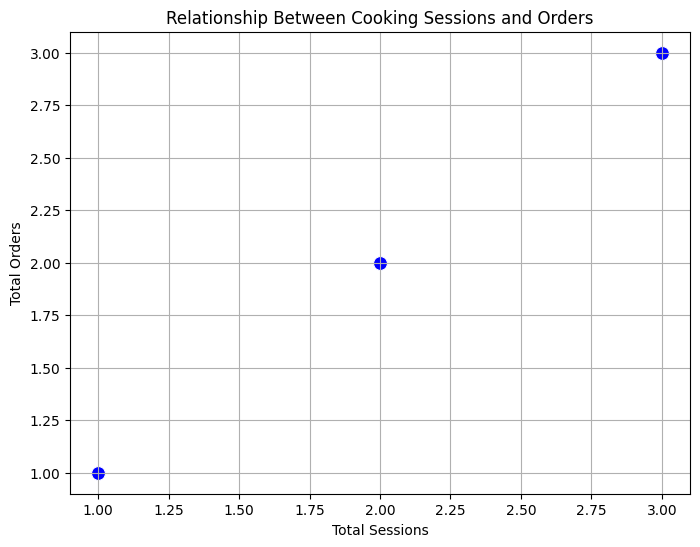

<ipython-input-5-fd70cd46f577>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='viridis')


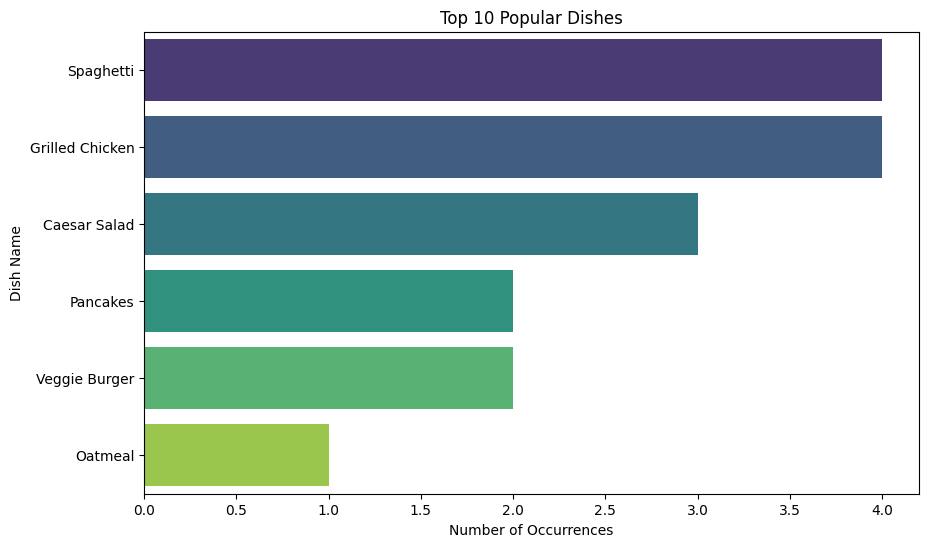

<ipython-input-5-fd70cd46f577>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_age_group = merged_data.groupby('Age Group')['Order ID'].nunique()
<ipython-input-5-fd70cd46f577>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_age_group.index, y=orders_by_age_group.values, palette='pastel')


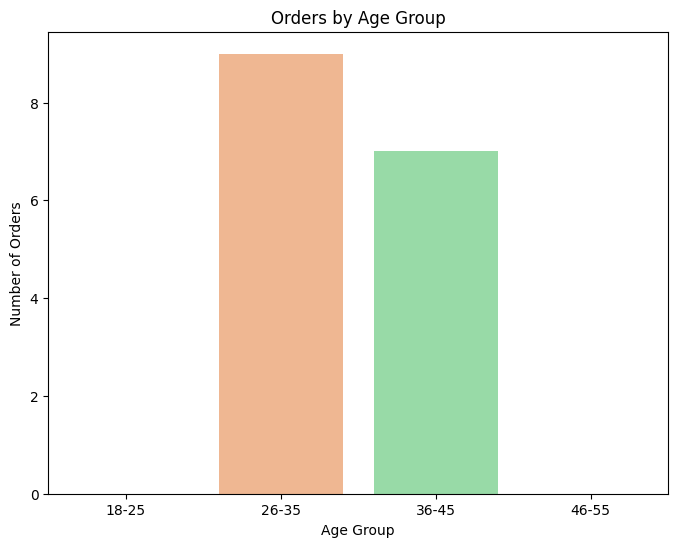

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between cooking sessions and user orders
session_order_analysis = merged_data.groupby('User ID_x').agg({
    'Session ID': 'nunique',  # Number of unique sessions
    'Order ID': 'nunique',    # Number of unique orders
}).reset_index().rename(columns={'Session ID': 'Total Sessions', 'Order ID': 'Total Orders'})

# Plot: Relationship between cooking sessions and orders
plt.figure(figsize=(8, 6))
sns.scatterplot(data=session_order_analysis, x='Total Sessions', y='Total Orders', s=100, color='blue')
plt.title('Relationship Between Cooking Sessions and Orders')
plt.xlabel('Total Sessions')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

# Identifying popular dishes
popular_dishes = merged_data['Dish Name_x'].value_counts().head(10)

# Plot: Top 10 Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='viridis')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Number of Occurrences')
plt.ylabel('Dish Name')
plt.show()

# Demographic analysis: Orders by age group
age_bins = [18, 25, 35, 45, 55]
age_labels = ['18-25', '26-35', '36-45', '46-55']
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=age_bins, labels=age_labels, right=False)

orders_by_age_group = merged_data.groupby('Age Group')['Order ID'].nunique()

# Plot: Orders by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x=orders_by_age_group.index, y=orders_by_age_group.values, palette='pastel')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.show()


**The analysis provides the following insights:**

**Relationship Between Cooking Sessions and Orders**:

A scatter plot shows how the number of cooking sessions correlates with user orders, indicating user engagement levels.                                   
**Top 6 Popular Dishes**:

A bar chart highlights the most frequently cooked dishes, showcasing user preferences.                                                                             
**Orders by Age Group**:

A bar chart displays the distribution of orders across different age groups, revealing demographic trends.